===== Datos generales =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column 

/tmp/ipython-input-223911781.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('id_programa')['promedio'].mean().reset_index(),


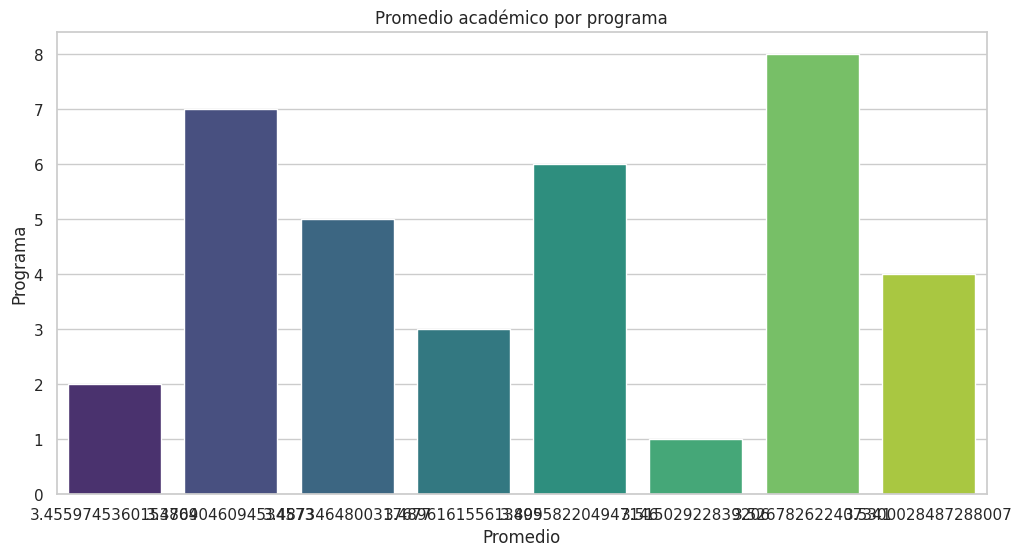

/tmp/ipython-input-223911781.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('id_programa')['asistencia'].mean().reset_index(),


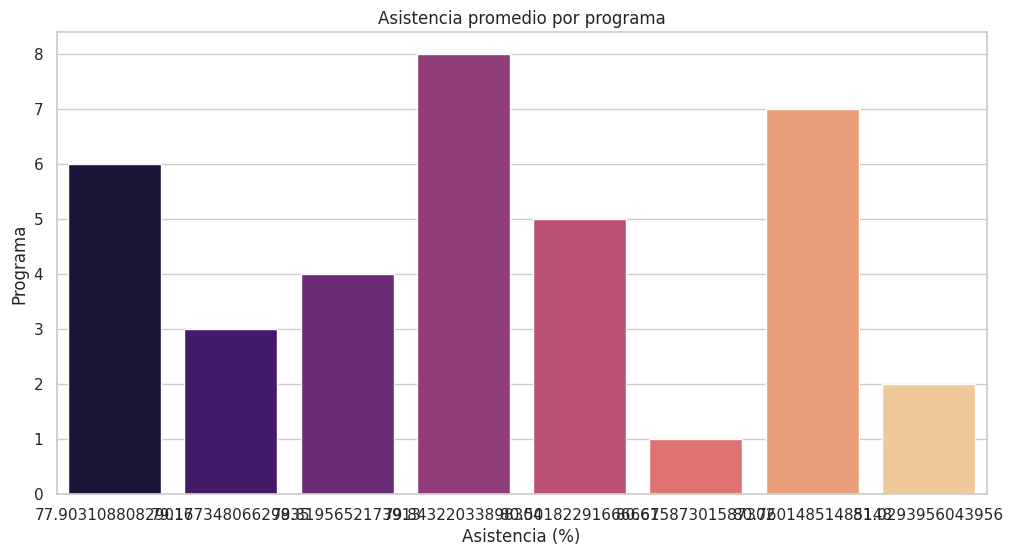

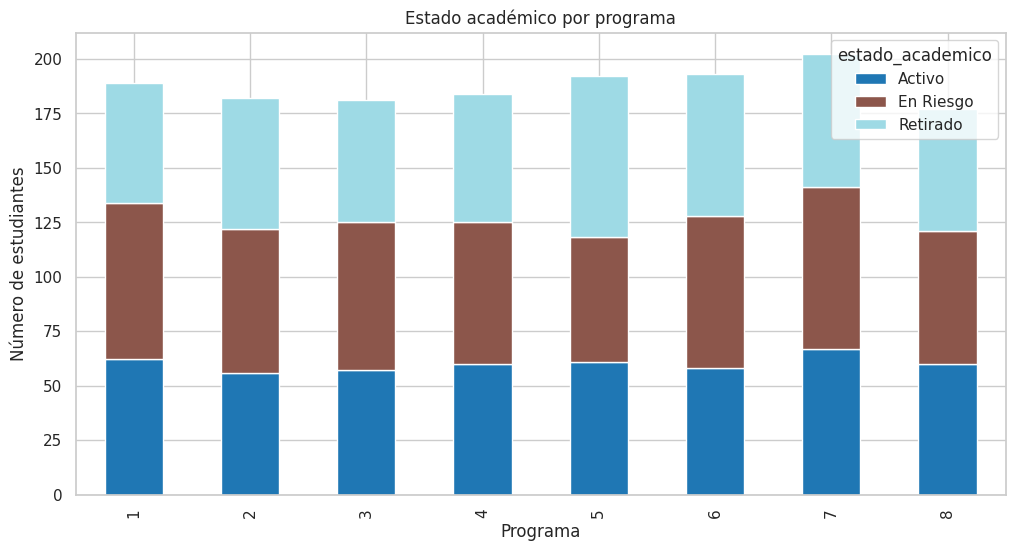

/tmp/ipython-input-223911781.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='id_sede', palette="Set2")


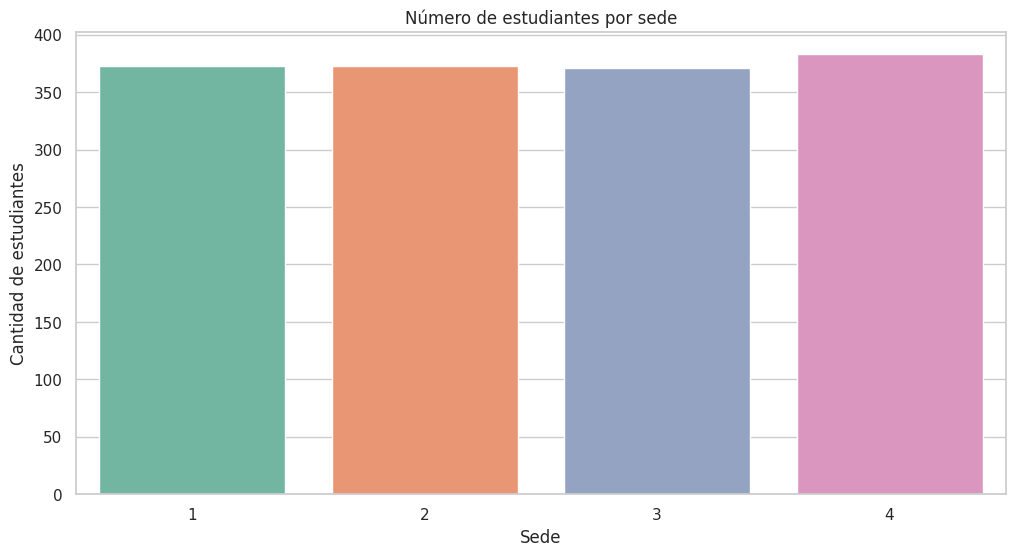

ValueError: Could not interpret value `genero` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# =========================================================
# EDA - INSTITUTO TALENTO FUTURO (dataset único)
# =========================================================

# 1️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# 2️⃣ Cargar dataset único
# Subir archivo Excel o CSV a Colab
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv("talento_futuro_completo.csv")

# 3️⃣ Revisar datos generales
print("===== Datos generales =====")
print(df.head())
print(df.info())
print(df.describe(include='all'))

# 4️⃣ Limpieza básica
# Rellenar nulos numéricos
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Rellenar nulos categóricos
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# Eliminar duplicados
df = df.drop_duplicates()

# 5️⃣ Análisis descriptivo
print("===== Estadísticas generales =====")
print(df.describe(include='all'))

# 6️⃣ Promedio académico por programa
plt.figure()
sns.barplot(data=df.groupby('id_programa')['promedio'].mean().reset_index(),
            x='promedio', y='id_programa', palette="viridis")
plt.title("Promedio académico por programa")
plt.xlabel("Promedio")
plt.ylabel("Programa")
plt.show()

# 7️⃣ Asistencia promedio por programa
plt.figure()
sns.barplot(data=df.groupby('id_programa')['asistencia'].mean().reset_index(),
            x='asistencia', y='id_programa', palette="magma")
plt.title("Asistencia promedio por programa")
plt.xlabel("Asistencia (%)")
plt.ylabel("Programa")
plt.show()

# 8️⃣ Estado académico por programa
estado_programa = df.groupby(['id_programa','estado_academico']).size().unstack(fill_value=0)
estado_programa.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Estado académico por programa")
plt.xlabel("Programa")
plt.ylabel("Número de estudiantes")
plt.show()

# 9️⃣ Distribución de estudiantes por sede
plt.figure()
sns.countplot(data=df, x='id_sede', palette="Set2")
plt.title("Número de estudiantes por sede")
plt.xlabel("Sede")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 🔟 Distribución de promedio por género
plt.figure()
sns.boxplot(data=df, x='genero', y='promedio', palette="pastel")
plt.title("Distribución de promedio académico por género")
plt.xlabel("Género")
plt.ylabel("Promedio")
plt.show()

# 1️⃣1️⃣ Distribución de edad
plt.figure()
sns.histplot(df['edad'], bins=15, kde=True, color='skyblue')
plt.title("Distribución de edad de estudiantes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 1️⃣2️⃣ Promedio académico por instructor
instr_promedio = df.groupby('id_instructor')['promedio'].mean().sort_values(ascending=False)
plt.figure()
instr_promedio.plot(kind='bar', color='coral')
plt.title("Promedio académico por instructor")
plt.xlabel("Instructor")
plt.ylabel("Promedio")
plt.show()

# 1️⃣3️⃣ Correlación entre variables numéricas
plt.figure()
sns.heatmap(df[['promedio','asistencia','edad','duracion_meses','costo_matricula','experiencia_años']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

# ✅ EDA completo
print("EDA completado. Dataset listo para análisis avanzado e insights accionables.")

In [ ]:
print(df.columns)


Index(['id_hecho', 'id_estudiante', 'id_programa', 'id_sede', 'id_tiempo',
       'id_instructor', 'promedio', 'asistencia', 'estado_academico',
       'observaciones'],
      dtype='object')


===== Primeras filas =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  

===== Información del dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data colu

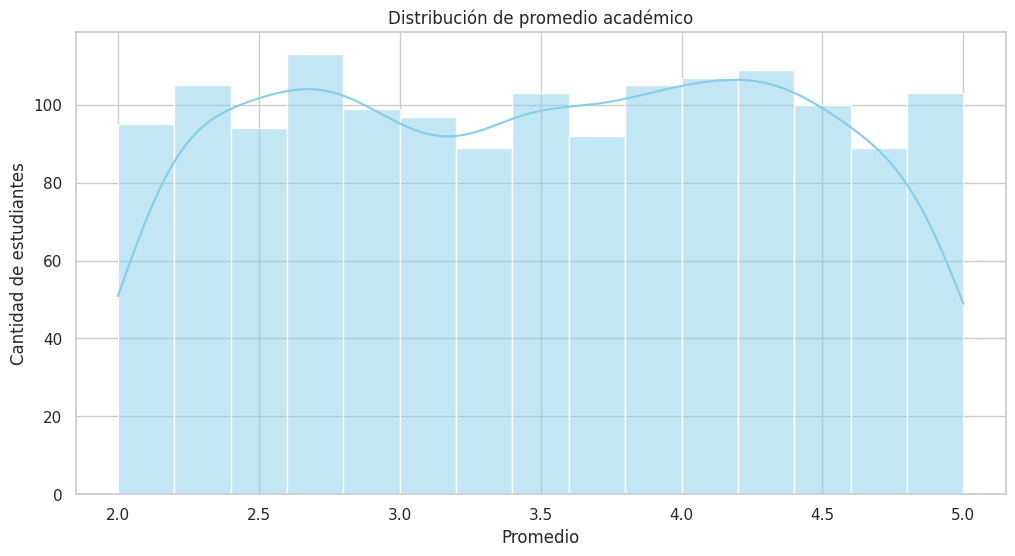

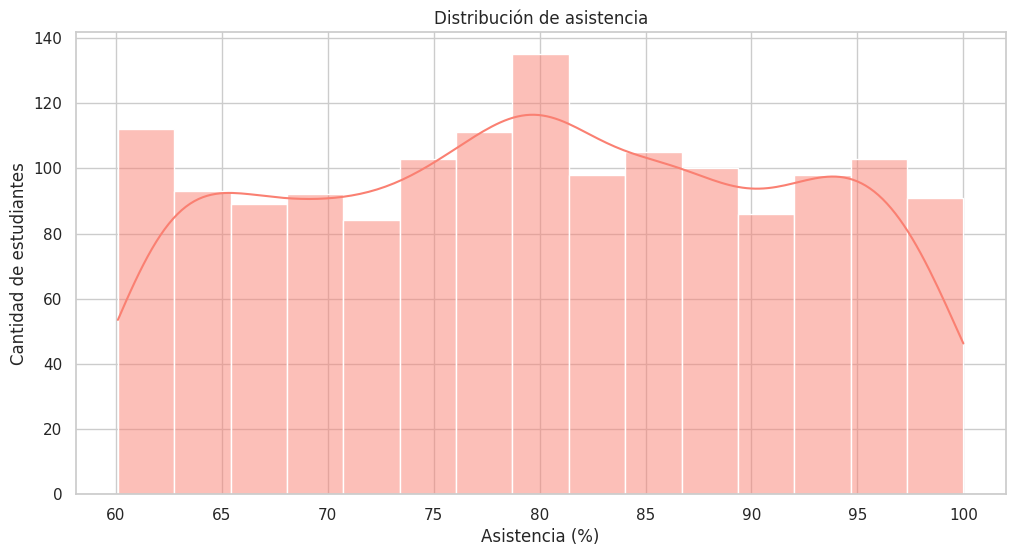

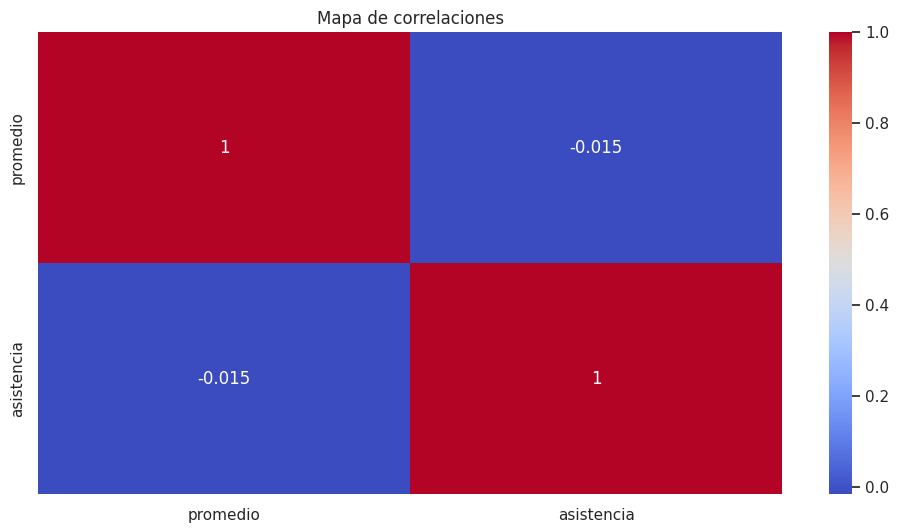

✅ EDA completo en dataset único finalizado.


In [ ]:
# =========================================================
# EDA COMPLETO - INSTITUTO TALENTO FUTURO
# Dataset único (todas las tablas combinadas)
# =========================================================

# 1️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# 2️⃣ Cargar dataset único
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv("talento_futuro_completo.csv")

# 3️⃣ Revisar datos generales
print("===== Primeras filas =====")
print(df.head())
print("\n===== Información del dataset =====")
print(df.info())
print("\n===== Estadísticas generales =====")
print(df.describe(include='all'))

# 4️⃣ Limpieza básica
# Números
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categóricos
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# Eliminar duplicados
df = df.drop_duplicates()

# 5️⃣ Distribución de promedio académico
plt.figure()
sns.histplot(df['promedio'], bins=15, kde=True, color='skyblue')
plt.title("Distribución de promedio académico")
plt.xlabel("Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 6️⃣ Distribución de asistencia
plt.figure()
sns.histplot(df['asistencia'], bins=15, kde=True, color='salmon')
plt.title("Distribución de asistencia")
plt.xlabel("Asistencia (%)")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 7️⃣ Estado académico por programa
if 'nombre_programa' in df.columns:
    estado_programa = df.groupby(['nombre_programa','estado_academico']).size().unstack(fill_value=0)
    estado_programa.plot(kind='bar', stacked=True, colormap='tab20')
    plt.title("Estado académico por programa")
    plt.xlabel("Programa")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

# 8️⃣ Promedio académico por programa
if 'nombre_programa' in df.columns:
    plt.figure()
    sns.barplot(data=df.groupby('nombre_programa')['promedio'].mean().reset_index(),
                x='promedio', y='nombre_programa', palette="viridis")
    plt.title("Promedio académico por programa")
    plt.xlabel("Promedio")
    plt.ylabel("Programa")
    plt.show()

# 9️⃣ Asistencia promedio por programa
if 'nombre_programa' in df.columns:
    plt.figure()
    sns.barplot(data=df.groupby('nombre_programa')['asistencia'].mean().reset_index(),
                x='asistencia', y='nombre_programa', palette="magma")
    plt.title("Asistencia promedio por programa")
    plt.xlabel("Asistencia (%)")
    plt.ylabel("Programa")
    plt.show()

# 🔟 Distribución de estudiantes por sede
if 'nombre_sede' in df.columns:
    plt.figure()
    sns.countplot(data=df, x='nombre_sede', palette="Set2")
    plt.title("Número de estudiantes por sede")
    plt.xlabel("Sede")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

# 1️⃣1️⃣ Promedio por género
if 'genero' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='genero', y='promedio', palette="pastel")
    plt.title("Distribución de promedio académico por género")
    plt.xlabel("Género")
    plt.ylabel("Promedio")
    plt.show()

# 1️⃣2️⃣ Distribución de edad
if 'edad' in df.columns:
    plt.figure()
    sns.histplot(df['edad'], bins=15, kde=True, color='lightgreen')
    plt.title("Distribución de edad de estudiantes")
    plt.xlabel("Edad")
    plt.ylabel("Cantidad de estudiantes")
    plt.show()

# 1️⃣3️⃣ Promedio académico por instructor
if 'nombre_instructor' in df.columns:
    instr_promedio = df.groupby('nombre_instructor')['promedio'].mean().sort_values(ascending=False)
    plt.figure()
    instr_promedio.plot(kind='bar', color='coral')
    plt.title("Promedio académico por instructor")
    plt.xlabel("Instructor")
    plt.ylabel("Promedio")
    plt.show()

# 1️⃣4️⃣ Correlaciones
num_vars = ['promedio','asistencia','edad','duracion_meses','costo_matricula','experiencia_años']
num_vars = [col for col in num_vars if col in df.columns]  # solo columnas que existen
plt.figure()
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones")
plt.show()

print("✅ EDA completo en dataset único finalizado.")


===== Primeras filas =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  

===== Información del dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data colu

/tmp/ipython-input-543951554.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")


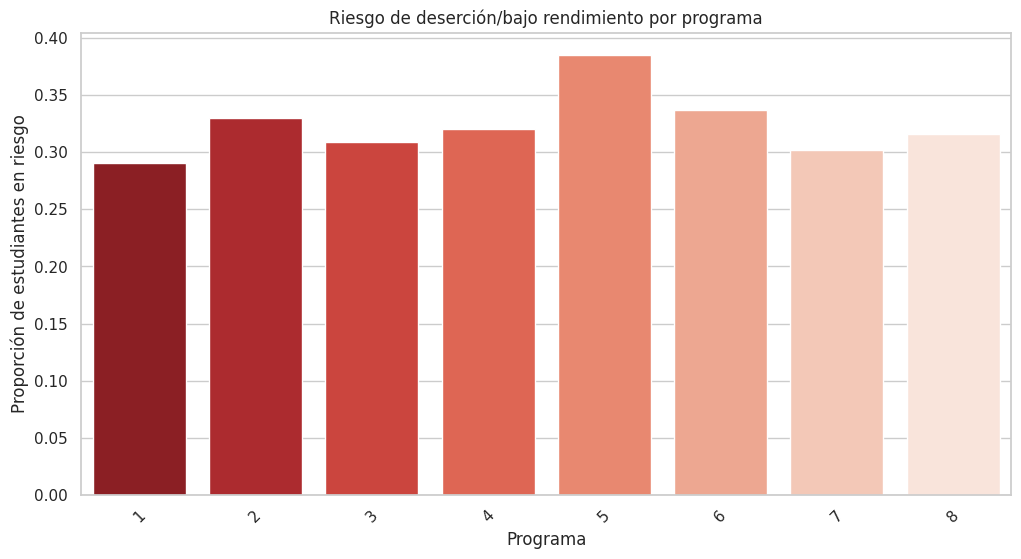


===== Promedio académico por instructor =====
id_instructor
11    3.631641
22    3.628525
19    3.612801
13    3.584954
18    3.580244
7     3.559896
24    3.541648
12    3.540780
14    3.534808
9     3.530784
20    3.529498
2     3.526364
4     3.524277
10    3.520483
17    3.511346
5     3.481700
16    3.476222
8     3.475769
3     3.471302
1     3.448934
25    3.388567
21    3.380923
23    3.348368
6     3.313448
15    3.312247
Name: promedio, dtype: float64


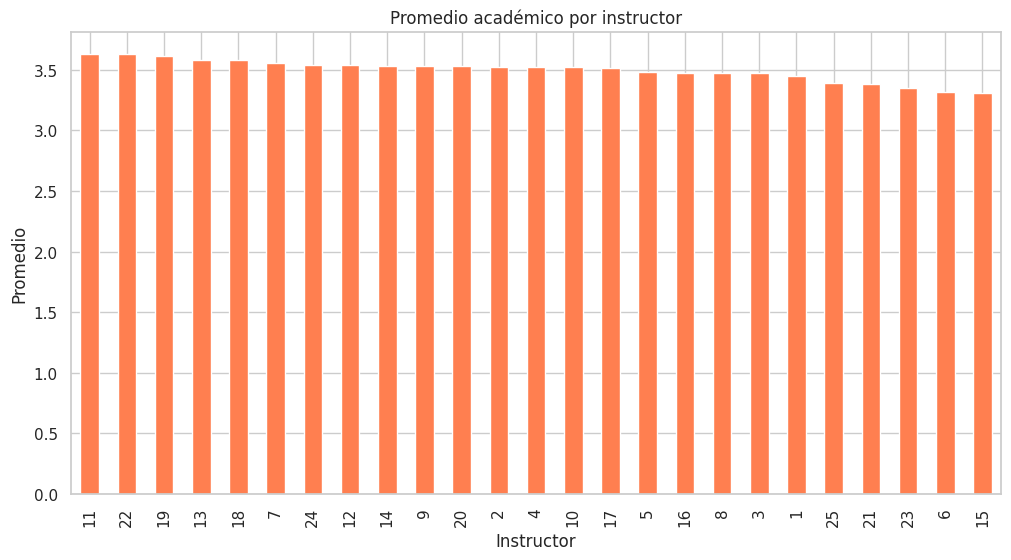

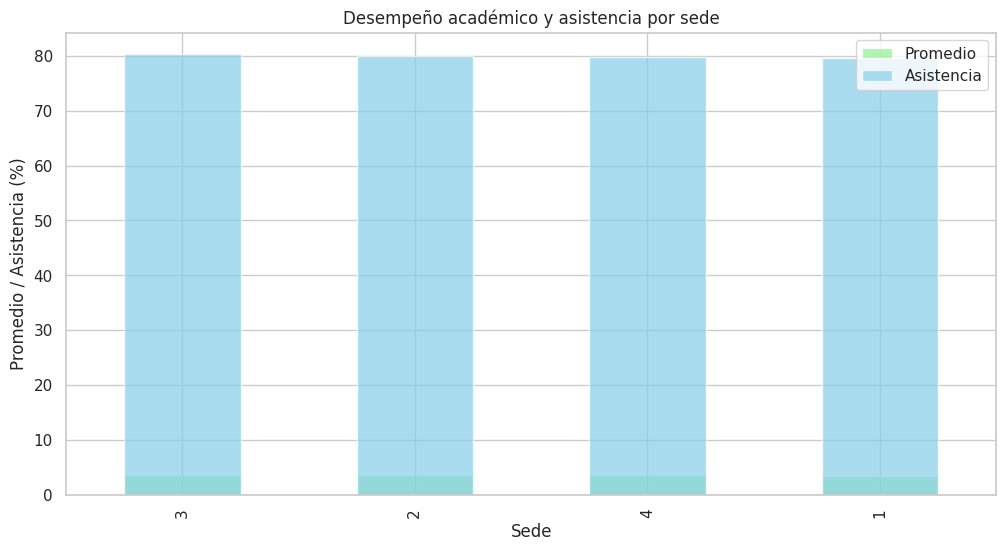

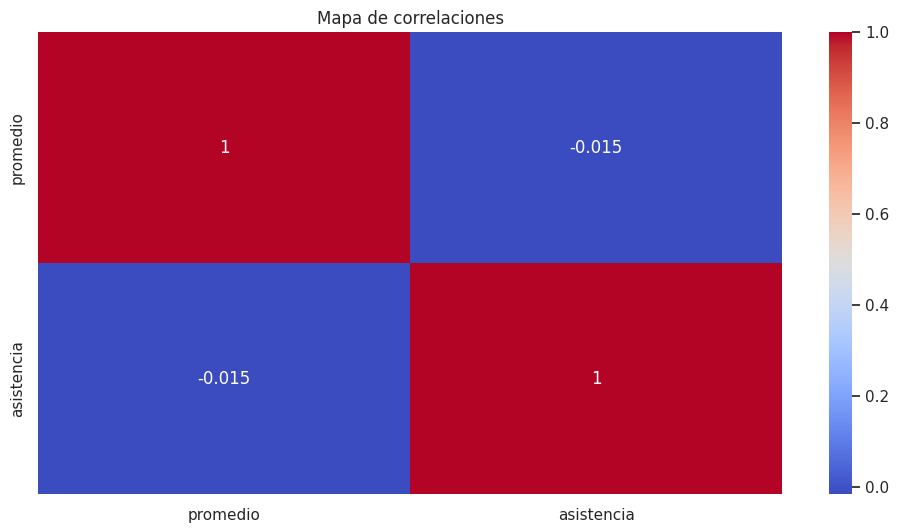

✅ EDA completo alineado al reto Talento Futuro finalizado.


In [ ]:
# =========================================================
# EDA Reto Talento Futuro - Instituto Técnico Laboral
# Dataset único (todas las tablas combinadas)
# =========================================================

# 1️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# 2️⃣ Cargar dataset único
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv("talento_futuro_completo.csv")

# 3️⃣ Revisión inicial
print("===== Primeras filas =====")
print(df.head())
print("\n===== Información del dataset =====")
print(df.info())
print("\n===== Estadísticas generales =====")
print(df.describe(include='all'))

# 4️⃣ Limpieza básica
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

df = df.drop_duplicates()

# 5️⃣ Identificar programas con mayor riesgo de deserción o bajo rendimiento
# Se asume que estado_academico tiene categorías: 'Aprobado', 'Reprobado', 'Retirado', etc.
if 'id_programa' in df.columns and 'estado_academico' in df.columns:
    programa_riesgo = df.groupby('id_programa')['estado_academico'].value_counts(normalize=True).unstack().fillna(0)
    if 'Reprobado' in programa_riesgo.columns or 'Retirado' in programa_riesgo.columns:
        programa_riesgo['riesgo'] = programa_riesgo.get('Reprobado',0) + programa_riesgo.get('Retirado',0)
        programa_riesgo = programa_riesgo.sort_values(by='riesgo', ascending=False)
        print("\n===== Programas con mayor riesgo de deserción o bajo rendimiento =====")
        print(programa_riesgo[['riesgo']])

        # Visualización
        plt.figure()
        sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")
        plt.xticks(rotation=45)
        plt.title("Riesgo de deserción/bajo rendimiento por programa")
        plt.ylabel("Proporción de estudiantes en riesgo")
        plt.xlabel("Programa")
        plt.show()

# 6️⃣ Análisis de factores demográficos (edad, género, estrato, barrio)
# Promedio por género
# if 'genero' in df.columns: # Commented out as 'genero' column is missing
#     plt.figure()
#     sns.boxplot(data=df, x='genero', y='promedio', palette="pastel")
#     plt.title("Promedio académico por género")
#     plt.xlabel("Género")
#     plt.ylabel("Promedio")
#     plt.show()

# Promedio por estrato
if 'estrato' in df.columns and 'promedio' in df.columns:
    plt.figure()
    sns.boxplot(data=df, x='estrato', y='promedio', palette="Set3")
    plt.title("Promedio académico por estrato")
    plt.xlabel("Estrato")
    plt.ylabel("Promedio")
    plt.show()

# Asistencia por barrio
if 'barrio' in df.columns and 'asistencia' in df.columns:
    asistencia_barrio = df.groupby('barrio')['asistencia'].mean().sort_values(ascending=False)
    plt.figure()
    asistencia_barrio.plot(kind='bar', color='skyblue')
    plt.title("Asistencia promedio por barrio")
    plt.ylabel("Asistencia (%)")
    plt.xlabel("Barrio")
    plt.show()

# Edad vs promedio
if 'edad' in df.columns and 'promedio' in df.columns and 'id_programa' in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x='edad', y='promedio', hue='id_programa', palette='tab10')
    plt.title("Relación edad vs promedio académico")
    plt.xlabel("Edad")
    plt.ylabel("Promedio")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()


# 7️⃣ Análisis de efectividad de instructores
if 'id_instructor' in df.columns and 'promedio' in df.columns:
    instr_promedio = df.groupby('id_instructor')['promedio'].mean().sort_values(ascending=False)
    print("\n===== Promedio académico por instructor =====")
    print(instr_promedio)

    plt.figure()
    instr_promedio.plot(kind='bar', color='coral')
    plt.title("Promedio académico por instructor")
    plt.ylabel("Promedio")
    plt.xlabel("Instructor")
    plt.show()

# 8️⃣ Desempeño académico por sede
if 'id_sede' in df.columns and 'promedio' in df.columns and 'asistencia' in df.columns:
    sede_promedio = df.groupby('id_sede')['promedio'].mean().sort_values(ascending=False)
    sede_asistencia = df.groupby('id_sede')['asistencia'].mean().sort_values(ascending=False)

    plt.figure()
    sede_promedio.plot(kind='bar', color='lightgreen', alpha=0.7, label='Promedio')
    sede_asistencia.plot(kind='bar', color='skyblue', alpha=0.7, label='Asistencia')
    plt.title("Desempeño académico y asistencia por sede")
    plt.ylabel("Promedio / Asistencia (%)")
    plt.xlabel("Sede")
    plt.legend()
    plt.show()

# 9️⃣ Evaluación de rentabilidad de programas
# Rentabilidad simple: promedio de estudiantes * costo_matricula / duracion_meses
if 'id_programa' in df.columns and 'costo_matricula' in df.columns and 'duracion_meses' in df.columns and 'promedio' in df.columns:
    programa_valor = df.groupby('id_programa').agg(
        estudiantes_activos=('id_estudiante', 'count'),
        promedio_academico=('promedio', 'mean'),
        costo_matricula=('costo_matricula', 'mean'),
        duracion_meses=('duracion_meses', 'mean')
    )
    # Check if costo_matricula and duracion_meses are not zero before calculating valor_relativo
    if (programa_valor['costo_matricula'] > 0).all() and (programa_valor['duracion_meses'] > 0).all():
        programa_valor['valor_relativo'] = (programa_valor['estudiantes_activos'] * programa_valor['promedio_academico']) / (programa_valor['costo_matricula'] / programa_valor['duracion_meses'])
        programa_valor = programa_valor.sort_values(by='valor_relativo', ascending=False)
        print("\n===== Programas con mayor valor relativo =====")
        print(programa_valor[['valor_relativo', 'estudiantes_activos', 'promedio_academico', 'costo_matricula']])

        plt.figure()
        sns.barplot(x=programa_valor.index, y=programa_valor['valor_relativo'], palette="viridis")
        plt.xticks(rotation=45)
        plt.title("Valor relativo de los programas")
        plt.ylabel("Valor relativo")
        plt.xlabel("Programa")
        plt.show()
    else:
        print("\n===== Cannot calculate Valor Relativo: Costo de Matricula or Duracion Meses contains zero values =====")


# 🔟 Correlaciones numéricas
num_vars = ['promedio','asistencia','edad','duracion_meses','costo_matricula','experiencia_años']
num_vars = [col for col in num_vars if col in df.columns]
if num_vars:
    plt.figure()
    sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
    plt.title("Mapa de correlaciones")
    plt.show()

print("✅ EDA completo alineado al reto Talento Futuro finalizado.")

In [ ]:
print(df.columns)
# Convertir a minúsculas, eliminar espacios y reemplazar espacios por guion bajo
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['id_hecho', 'id_estudiante', 'id_programa', 'id_sede', 'id_tiempo',
       'id_instructor', 'promedio', 'asistencia', 'estado_academico',
       'observaciones'],
      dtype='object')
Index(['id_hecho', 'id_estudiante', 'id_programa', 'id_sede', 'id_tiempo',
       'id_instructor', 'promedio', 'asistencia', 'estado_academico',
       'observaciones'],
      dtype='object')


===== Primeras filas =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  

===== Información del dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data colu

/tmp/ipython-input-2154282858.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")


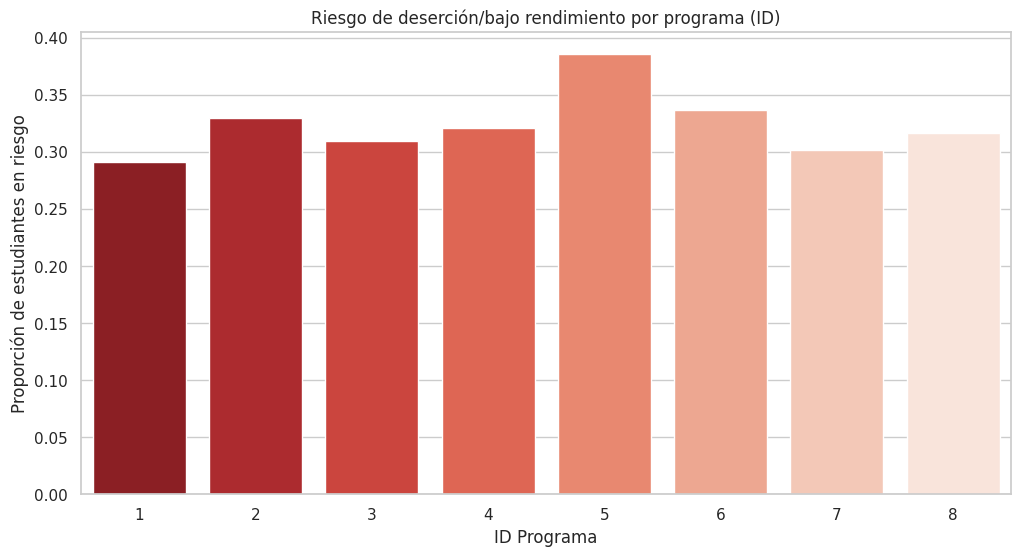

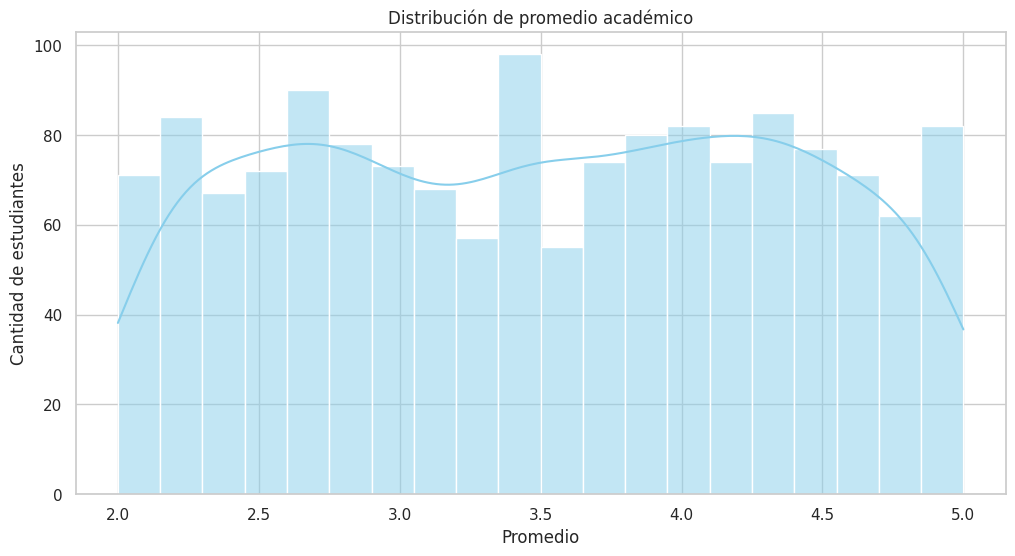

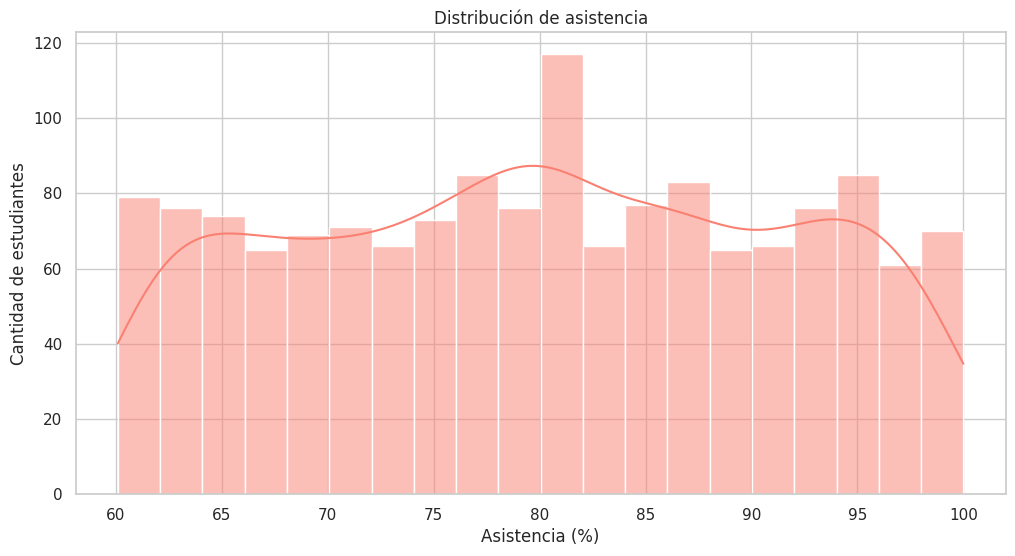

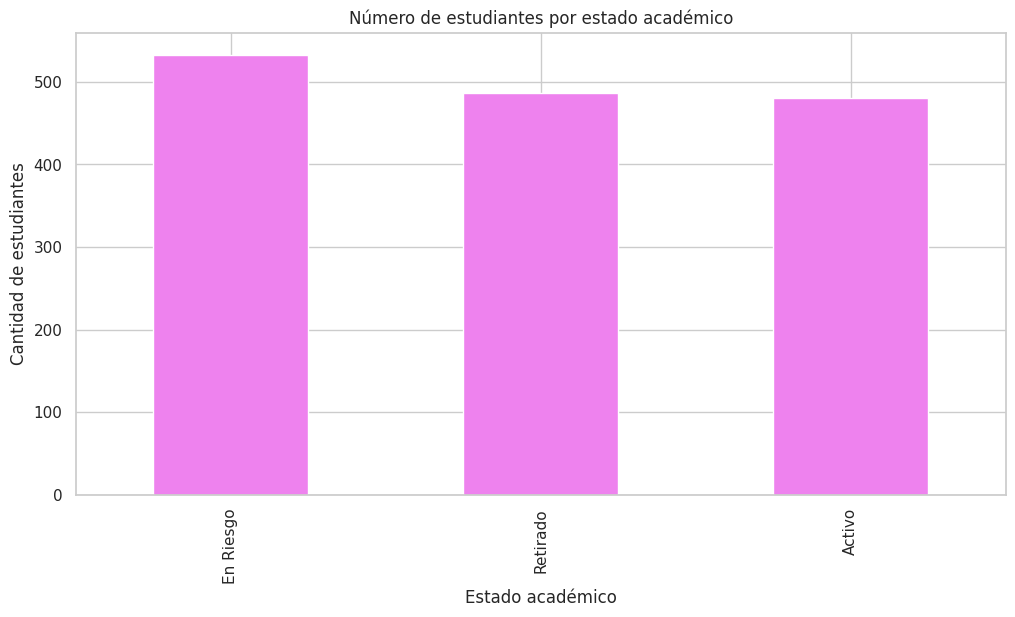


===== Promedio académico por instructor (ID) =====
id_instructor
11    3.631641
22    3.628525
19    3.612801
13    3.584954
18    3.580244
7     3.559896
24    3.541648
12    3.540780
14    3.534808
9     3.530784
20    3.529498
2     3.526364
4     3.524277
10    3.520483
17    3.511346
5     3.481700
16    3.476222
8     3.475769
3     3.471302
1     3.448934
25    3.388567
21    3.380923
23    3.348368
6     3.313448
15    3.312247
Name: promedio, dtype: float64


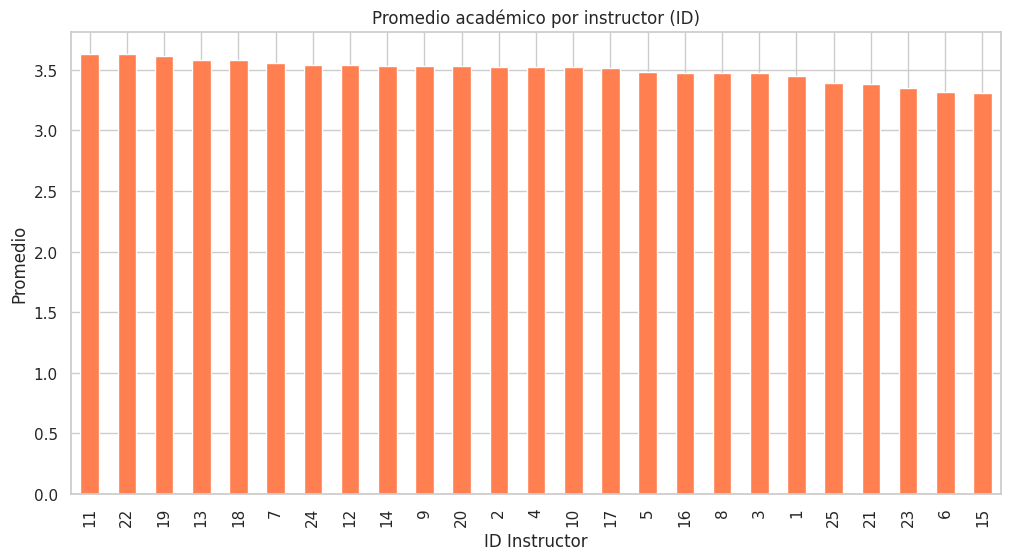

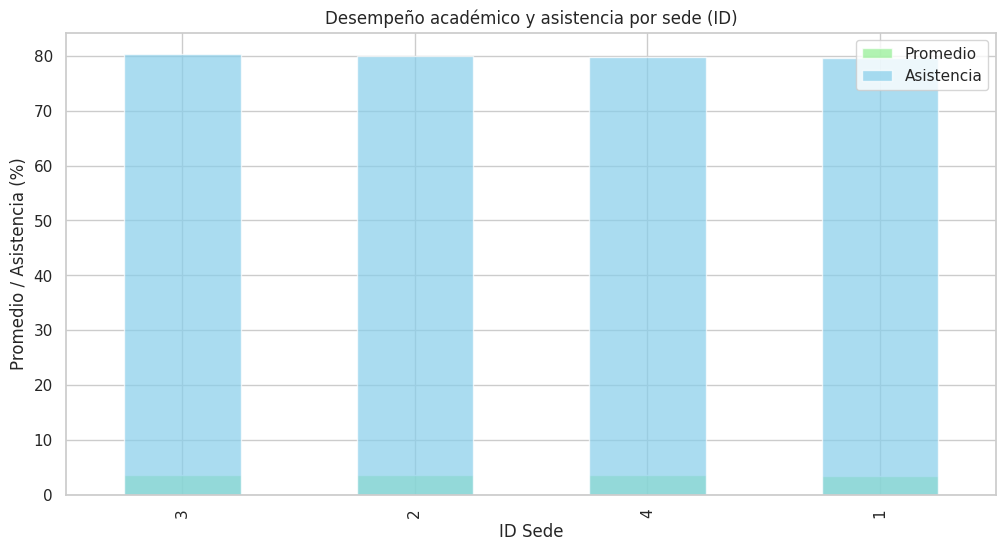

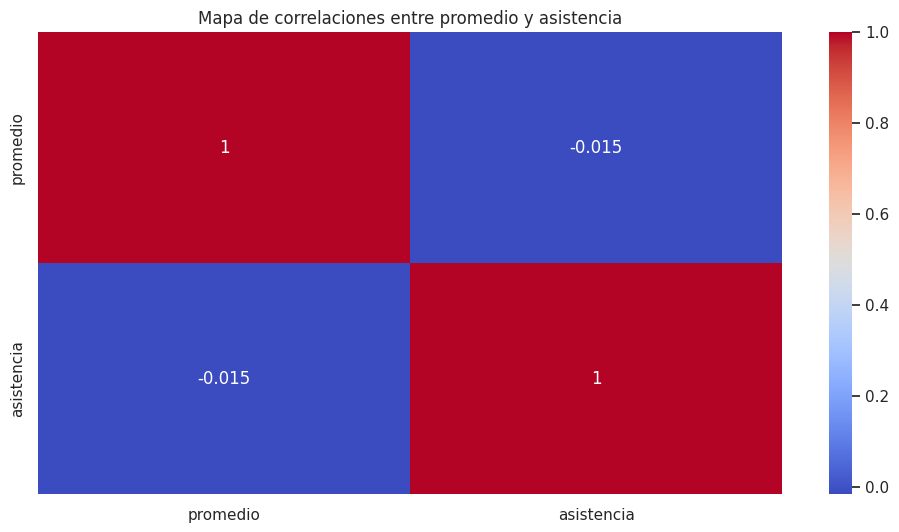

✅ EDA completo para el reto Talento Futuro (basado en IDs) finalizado.


In [ ]:
# =========================================================
# EDA Reto Talento Futuro - Instituto Técnico Laboral
# Dataset: hechos_academicos (IDs de programa, sede, instructor, estudiante)
# =========================================================

# 1️⃣ Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# 2️⃣ Cargar dataset único
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv("hechos_academicos.csv")

# 3️⃣ Revisión inicial
print("===== Primeras filas =====")
print(df.head())
print("\n===== Información del dataset =====")
print(df.info())
print("\n===== Estadísticas generales =====")
print(df.describe(include='all'))

# 4️⃣ Limpieza básica
# Números
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categóricos
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# Eliminar duplicados
df = df.drop_duplicates()

# 5️⃣ Identificar programas con mayor riesgo de deserción o bajo rendimiento
# Riesgo = proporción de estudiantes "Reprobado" o "Retirado"
programa_riesgo = df.groupby('id_programa')['estado_academico'].value_counts(normalize=True).unstack().fillna(0)
programa_riesgo['riesgo'] = programa_riesgo.get('Reprobado',0) + programa_riesgo.get('Retirado',0)
programa_riesgo = programa_riesgo.sort_values(by='riesgo', ascending=False)
print("\n===== Programas con mayor riesgo =====")
print(programa_riesgo[['riesgo']])

# Visualización
plt.figure()
sns.barplot(x=programa_riesgo.index, y=programa_riesgo['riesgo'], palette="Reds_r")
plt.title("Riesgo de deserción/bajo rendimiento por programa (ID)")
plt.xlabel("ID Programa")
plt.ylabel("Proporción de estudiantes en riesgo")
plt.show()

# 6️⃣ Distribución de promedio académico
plt.figure()
sns.histplot(df['promedio'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de promedio académico")
plt.xlabel("Promedio")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 7️⃣ Distribución de asistencia
plt.figure()
sns.histplot(df['asistencia'], bins=20, kde=True, color='salmon')
plt.title("Distribución de asistencia")
plt.xlabel("Asistencia (%)")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 8️⃣ Estado académico general
estado_counts = df['estado_academico'].value_counts()
plt.figure()
estado_counts.plot(kind='bar', color='violet')
plt.title("Número de estudiantes por estado académico")
plt.xlabel("Estado académico")
plt.ylabel("Cantidad de estudiantes")
plt.show()

# 9️⃣ Análisis de efectividad de instructores
instr_promedio = df.groupby('id_instructor')['promedio'].mean().sort_values(ascending=False)
print("\n===== Promedio académico por instructor (ID) =====")
print(instr_promedio)

plt.figure()
instr_promedio.plot(kind='bar', color='coral')
plt.title("Promedio académico por instructor (ID)")
plt.xlabel("ID Instructor")
plt.ylabel("Promedio")
plt.show()

# 10️⃣ Análisis de desempeño por sede
sede_promedio = df.groupby('id_sede')['promedio'].mean().sort_values(ascending=False)
sede_asistencia = df.groupby('id_sede')['asistencia'].mean().sort_values(ascending=False)

plt.figure()
sede_promedio.plot(kind='bar', color='lightgreen', alpha=0.7, label='Promedio')
sede_asistencia.plot(kind='bar', color='skyblue', alpha=0.7, label='Asistencia')
plt.title("Desempeño académico y asistencia por sede (ID)")
plt.xlabel("ID Sede")
plt.ylabel("Promedio / Asistencia (%)")
plt.legend()
plt.show()

# 11️⃣ Correlaciones
num_vars = ['promedio','asistencia']
plt.figure()
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlaciones entre promedio y asistencia")
plt.show()

# 12️⃣ Análisis de rentabilidad (aproximada)
# Suponiendo que costo_matricula y duracion_meses son parte de df
if 'costo_matricula' in df.columns and 'duracion_meses' in df.columns:
    programa_valor = df.groupby('id_programa').agg(
        estudiantes_activos=('id_estudiante', 'count'),
        promedio_academico=('promedio', 'mean'),
        costo_matricula=('costo_matricula', 'mean'),
        duracion_meses=('duracion_meses', 'mean')
    )
    programa_valor['valor_relativo'] = (programa_valor['estudiantes_activos'] * programa_valor['promedio_academico']) / programa_valor['costo_matricula']
    programa_valor = programa_valor.sort_values(by='valor_relativo', ascending=False)
    print("\n===== Programas con mayor valor relativo (ID) =====")
    print(programa_valor[['valor_relativo','estudiantes_activos','promedio_academico','costo_matricula']])

    plt.figure()
    sns.barplot(x=programa_valor.index, y=programa_valor['valor_relativo'], palette="viridis")
    plt.title("Valor relativo de programas (ID)")
    plt.xlabel("ID Programa")
    plt.ylabel("Valor relativo")
    plt.show()

print("✅ EDA completo para el reto Talento Futuro (basado en IDs) finalizado.")


In [ ]:
# =========================================================
# EDA Reto Talento Futuro - Instituto Técnico Laboral
# Dataset: hechos_academicos (IDs de programa, sede, instructor, estudiante)
# Sin gráficos, solo resultados en texto
# =========================================================

# 1️⃣ Importar librerías
import pandas as pd
import numpy as np

# 2️⃣ Cargar dataset único
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv("hechos_academicos.csv")

# 3️⃣ Revisión inicial
print("===== Primeras filas =====")
print(df.head())
print("\n===== Información del dataset =====")
print(df.info())
print("\n===== Estadísticas generales =====")
print(df.describe(include='all'))

# 4️⃣ Limpieza básica
# Números
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categóricos
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna("Desconocido")

# Eliminar duplicados
df = df.drop_duplicates()

# 5️⃣ Identificar programas con mayor riesgo de deserción o bajo rendimiento
programa_riesgo = df.groupby('id_programa')['estado_academico'].value_counts(normalize=True).unstack().fillna(0)
programa_riesgo['riesgo'] = programa_riesgo.get('Reprobado',0) + programa_riesgo.get('Retirado',0)
programa_riesgo = programa_riesgo.sort_values(by='riesgo', ascending=False)
print("\n===== Programas con mayor riesgo =====")
print(programa_riesgo[['riesgo']])

# 6️⃣ Distribución de promedio académico
promedio_desc = df['promedio'].describe()
print("\n===== Distribución de promedio académico =====")
print(promedio_desc)

# 7️⃣ Distribución de asistencia
asistencia_desc = df['asistencia'].describe()
print("\n===== Distribución de asistencia =====")
print(asistencia_desc)

# 8️⃣ Estado académico general
estado_counts = df['estado_academico'].value_counts()
print("\n===== Número de estudiantes por estado académico =====")
print(estado_counts)

# 9️⃣ Análisis de efectividad de instructores
instr_promedio = df.groupby('id_instructor')['promedio'].mean().sort_values(ascending=False)
print("\n===== Promedio académico por instructor (ID) =====")
print(instr_promedio)

# 10️⃣ Análisis de desempeño por sede
sede_promedio = df.groupby('id_sede')['promedio'].mean().sort_values(ascending=False)
sede_asistencia = df.groupby('id_sede')['asistencia'].mean().sort_values(ascending=False)
print("\n===== Promedio académico por sede (ID) =====")
print(sede_promedio)
print("\n===== Asistencia promedio por sede (ID) =====")
print(sede_asistencia)

# 11️⃣ Correlaciones
num_vars = ['promedio','asistencia']
correlaciones = df[num_vars].corr()
print("\n===== Correlaciones entre promedio y asistencia =====")
print(correlaciones)

# 12️⃣ Análisis de rentabilidad aproximada
if 'costo_matricula' in df.columns and 'duracion_meses' in df.columns:
    programa_valor = df.groupby('id_programa').agg(
        estudiantes_activos=('id_estudiante', 'count'),
        promedio_academico=('promedio', 'mean'),
        costo_matricula=('costo_matricula', 'mean'),
        duracion_meses=('duracion_meses', 'mean')
    )
    programa_valor['valor_relativo'] = (programa_valor['estudiantes_activos'] * programa_valor['promedio_academico']) / programa_valor['costo_matricula']
    programa_valor = programa_valor.sort_values(by='valor_relativo', ascending=False)
    print("\n===== Programas con mayor valor relativo (ID) =====")
    print(programa_valor[['valor_relativo','estudiantes_activos','promedio_academico','costo_matricula']])

print("\n✅ EDA completo para el reto Talento Futuro (basado en IDs) finalizado.")


===== Primeras filas =====
   id_hecho  id_estudiante  id_programa  id_sede  id_tiempo  id_instructor  \
0         1            247            6        3          1             17   
1         2             81            8        4          5             15   
2         3            510            1        1          4             14   
3         4            312            4        4          3             12   
4         5            574            8        3          6             15   

   promedio  asistencia estado_academico        observaciones  
0      4.00       80.90           Activo   Baja participación  
1      3.08       95.10           Activo                  NaN  
2      3.18       80.05           Activo                  NaN  
3      3.32       75.10           Activo  Excelente desempeño  
4      3.39       72.10           Activo                  NaN  

===== Información del dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data colu

In [ ]:
# =========================================================
# Programas más rentables y con mayor cantidad de estudiantes
# =========================================================

import pandas as pd

# Cargar dataset único
df = pd.read_excel("/content/estudiantes_tecnicos_limpiiiio.xlsx")  # o pd.read_csv(...)

# Limpieza básica (llenar valores faltantes)
df['promedio'] = df['promedio'].fillna(df['promedio'].mean())
# The columns 'costo_matricula' and 'duracion_meses' were not found in the dataframe.
# if 'costo_matricula' in df.columns:
#     df['costo_matricula'] = df['costo_matricula'].fillna(df['costo_matricula'].mean())
# if 'duracion_meses' in df.columns:
#     df['duracion_meses'] = df['duracion_meses'].fillna(df['duracion_meses'].mean())

# Agrupar por programa
programa_valor = df.groupby('id_programa').agg(
    estudiantes_activos=('id_estudiante', 'count'),
    promedio_academico=('promedio', 'mean'),
    # costo_matricula=('costo_matricula', 'mean') # Removed as column is missing
)

# Calculate a simplified "value" based on available columns
programa_valor['valor_relativo_simplificado'] = programa_valor['estudiantes_activos'] * programa_valor['promedio_academico']


# Ordenar by this simplified value and students
programa_valor_ordenado = programa_valor.sort_values(by=['valor_relativo_simplificado','estudiantes_activos'], ascending=False)

print("\n===== Programas con mayor valor (simplificado) y con mayor cantidad de estudiantes =====")
print(programa_valor_ordenado)


===== Programas con mayor valor (simplificado) y con mayor cantidad de estudiantes =====
             estudiantes_activos  promedio_academico  \
id_programa                                            
7                            202            3.476905   
6                            193            3.495582   
5                            192            3.487346   
1                            189            3.515029   
4                            184            3.530003   
3                            181            3.489616   
2                            182            3.455975   
8                            177            3.526783   

             valor_relativo_simplificado  
id_programa                               
7                             702.334731  
6                             674.647366  
5                             669.570524  
1                             664.340524  
4                             649.520524  
3                             631.620524  
2    

In [ ]:
# ===========================================
# 🧾 Separar tablas desde un Excel relacional
# Autor: Miro
# Descripción: Carga un Excel con varias hojas y exporta cada hoja a un archivo separado.
# ===========================================

import pandas as pd

# 1️⃣ Subir el archivo desde tu computadora a Colab
from google.colab import files
print("📤 Sube tu archivo Excel (por ejemplo: base_datos.xlsx)")
uploaded = files.upload()

# 2️⃣ Especifica el nombre del archivo cargado
nombre_archivo = list(uploaded.keys())[0]

# 3️⃣ Leer todas las hojas del archivo Excel en un diccionario
data = pd.read_excel(nombre_archivo, sheet_name=None)

print(f"\n📚 Hojas encontradas en {nombre_archivo}:")
for hoja in data.keys():
    print(f" - {hoja}")

# 4️⃣ Guardar cada hoja como un Excel independiente
for nombre_hoja, df in data.items():
    nombre_salida = f"{nombre_hoja}.xlsx"
    df.to_excel(nombre_salida, index=False)
    print(f"✅ Tabla '{nombre_hoja}' exportada como '{nombre_salida}'")

print("\n🎯 Proceso completado. Ahora puedes descargar los archivos generados.")

# 5️⃣ Permitir descarga directa desde Colab
for nombre_hoja in data.keys():
    files.download(f"{nombre_hoja}.xlsx")


📤 Sube tu archivo Excel (por ejemplo: base_datos.xlsx)


Saving estudiantes_tecnicos_limpiiiio.xlsx to estudiantes_tecnicos_limpiiiio (1).xlsx

📚 Hojas encontradas en estudiantes_tecnicos_limpiiiio (1).xlsx:
 - hechos_academicos
 - dim_estudiantes
 - dim_programas
 - dim_sedes
 - dim_tiempo
 - dim_instructores
✅ Tabla 'hechos_academicos' exportada como 'hechos_academicos.xlsx'
✅ Tabla 'dim_estudiantes' exportada como 'dim_estudiantes.xlsx'
✅ Tabla 'dim_programas' exportada como 'dim_programas.xlsx'
✅ Tabla 'dim_sedes' exportada como 'dim_sedes.xlsx'
✅ Tabla 'dim_tiempo' exportada como 'dim_tiempo.xlsx'
✅ Tabla 'dim_instructores' exportada como 'dim_instructores.xlsx'

🎯 Proceso completado. Ahora puedes descargar los archivos generados.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ===========================================
# 📊 Separar hojas de un Excel y exportar a CSV
# Autor: Miro
# Descripción: Carga un Excel con múltiples hojas y exporta cada una a un archivo CSV individual.
# ===========================================

import pandas as pd
from google.colab import files

# 1️⃣ Subir el archivo Excel desde tu computador
print("📤 Sube tu archivo Excel (por ejemplo: base_datos.xlsx)")
uploaded = files.upload()

# 2️⃣ Obtener el nombre del archivo subido
nombre_archivo = list(uploaded.keys())[0]

# 3️⃣ Leer todas las hojas del archivo Excel en un diccionario
data = pd.read_excel(nombre_archivo, sheet_name=None)

print(f"\n📚 Hojas encontradas en {nombre_archivo}:")
for hoja in data.keys():
    print(f" - {hoja}")

# 4️⃣ Guardar cada hoja como CSV
for nombre_hoja, df in data.items():
    nombre_salida = f"{nombre_hoja}.csv"
    df.to_csv(nombre_salida, index=False, encoding='utf-8-sig')
    print(f"✅ Tabla '{nombre_hoja}' exportada como '{nombre_salida}'")

print("\n🎯 Proceso completado. Archivos listos para descargar:")

# 5️⃣ Permitir descargar los archivos CSV generados
for nombre_hoja in data.keys():
    files.download(f"{nombre_hoja}.csv")


📤 Sube tu archivo Excel (por ejemplo: base_datos.xlsx)


Saving estudiantes_tecnicos_limpiiiio.xlsx to estudiantes_tecnicos_limpiiiio.xlsx

📚 Hojas encontradas en estudiantes_tecnicos_limpiiiio.xlsx:
 - hechos_academicos
 - dim_estudiantes
 - dim_programas
 - dim_sedes
 - dim_tiempo
 - dim_instructores
✅ Tabla 'hechos_academicos' exportada como 'hechos_academicos.csv'
✅ Tabla 'dim_estudiantes' exportada como 'dim_estudiantes.csv'
✅ Tabla 'dim_programas' exportada como 'dim_programas.csv'
✅ Tabla 'dim_sedes' exportada como 'dim_sedes.csv'
✅ Tabla 'dim_tiempo' exportada como 'dim_tiempo.csv'
✅ Tabla 'dim_instructores' exportada como 'dim_instructores.csv'

🎯 Proceso completado. Archivos listos para descargar:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import pyodbc

# 🔌 Conexión a SQL Server
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=TU_SERVIDOR;'
    'DATABASE=TU_BASE_DE_DATOS;'
    'Trusted_Connection=yes;'
)

# Cargar la tabla
df_programas = pd.read_sql('/content/dim_programas.csv', conn)


Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 17 for SQL Server' : file not found (0) (SQLDriverConnect)")

Saving dim_estudiantes.xlsx to dim_estudiantes (2).xlsx
Primeras filas:


,id_estudiante,nombre_completo,genero,edad,estrato,barrio,contacto_email,telefono
0,1,Mateo Pérez Rodríguez,M,24.0,4.0,Buenos Aires,mateopérezrodríguez@gmail.com,3210053353
1,2,Jorge Gómez Ortiz,M,18.0,6.0,Robledo,NaN,3334760738
2,3,Andrés Ramírez Ortiz,M,22.0,6.0,Itagüí,andrésramírezortiz@gmail.com,3797808098
3,4,Jorge Restrepo López,M,26.0,4.0,Envigado,jorgerestrepolópez@gmail.com,3106977991
4,5,Daniel Restrepo Jiménez,M,22.0,5.0,Belén,danielrestrepojiménez@gmail.com,3919795579



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_estudiante    600 non-null    int64  
 1   nombre_completo  600 non-null    object 
 2   genero           600 non-null    object 
 3   edad             555 non-null    float64
 4   estrato          521 non-null    float64
 5   barrio           600 non-null    object 
 6   contacto_email   562 non-null    object 
 7   telefono         600 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 37.6+ KB
None

Promedios por género:


,genero,edad,estrato
0,F,23.136986,3.581227
1,M,22.908367,3.426724
2,Otro,20.583333,3.833333


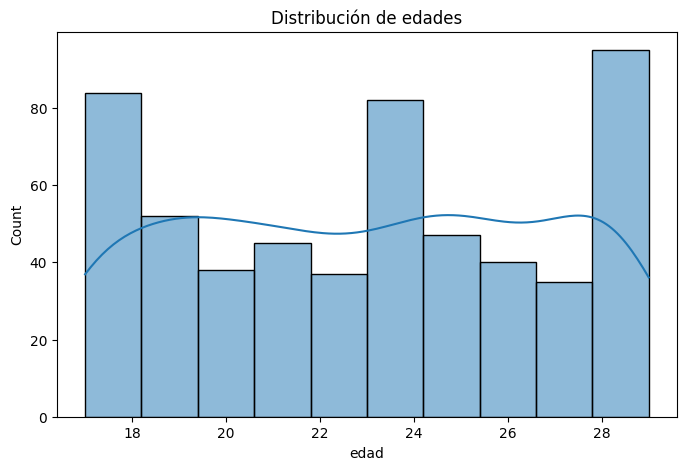

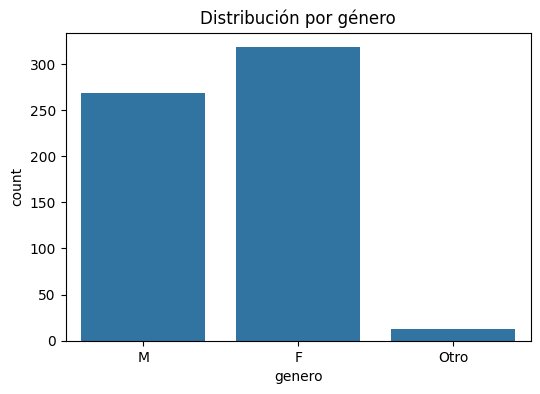

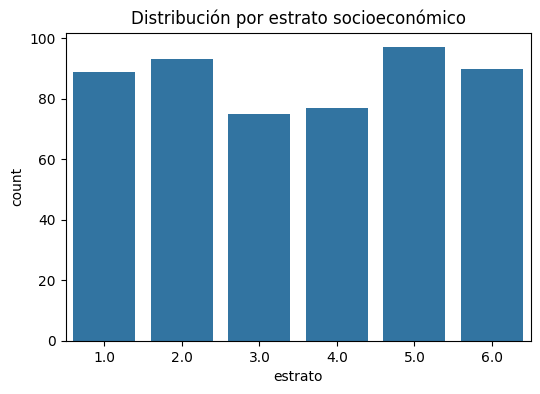

In [ ]:
# --- Paso 1: Instalar y cargar librerías ---
!pip install pandas seaborn matplotlib openpyxl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Paso 2: Subir el archivo CSV desde tu PC ---
from google.colab import files
uploaded = files.upload()

# --- Paso 3: Cargar el CSV a un DataFrame ---
# Ajusta el nombre al archivo que subas (por ejemplo: dim_estudiantes.csv)
df = pd.read_excel("/content/dim_estudiantes (1).xlsx")

# --- Paso 4: Verificar estructura y tipos de datos ---
print("Primeras filas:")
display(df.head())
print("\nInformación del DataFrame:")
print(df.info())

# --- Paso 5: Limpiar o transformar columnas si es necesario ---
# Convertir edad and estrato to numerical, handling potential errors
df["edad"] = pd.to_numeric(df["edad"], errors="coerce")
df["estrato"] = pd.to_numeric(df["estrato"], errors="coerce")

# --- Paso 6: Análisis descriptivo por género, edad y estrato ---
# Agrupar by género
# Checking if 'genero' column exists before grouping
if 'genero' in df.columns:
    desempeno_genero = df.groupby("genero")[["edad", "estrato"]].mean().reset_index()
    print("\nPromedios por género:")
    display(desempeno_genero)
else:
    print("\nColumn 'genero' not found in DataFrame. Skipping analysis by gender.")


# --- Paso 7: Visualizaciones ---
# Checking if 'edad' column exists before plotting
if 'edad' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df["edad"], kde=True, bins=10)
    plt.title("Distribución de edades")
    plt.show()
else:
    print("\nColumn 'edad' not found in DataFrame. Skipping age distribution plot.")

# Checking if 'genero' column exists before plotting
if 'genero' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="genero")
    plt.title("Distribución por género")
    plt.show()
else:
    print("\nColumn 'genero' not found in DataFrame. Skipping gender distribution plot.")

# Checking if 'estrato' column exists before plotting
if 'estrato' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="estrato")
    plt.title("Distribución por estrato socioeconómico")
    plt.show()
else:
    print("\nColumn 'estrato' not found in DataFrame. Skipping estrato distribution plot.")

In [ ]:
# --- Paso 1: Instalar y cargar librerías ---
!pip install pandas openpyxl

import pandas as pd

# --- Paso 2: Subir el archivo desde tu PC ---
from google.colab import files
uploaded = files.upload()

# --- Paso 3: Cargar el archivo a un DataFrame ---
# Ajusta el nombre al archivo que subas (por ejemplo: dim_estudiantes.xlsx)
df = pd.read_excel("/content/dim_estudiantes (1).xlsx")

# --- Paso 4: Verificar estructura y tipos de datos ---
print("Primeras filas:")
print(df.head())
print("\nInformación del DataFrame:")
print(df.info())

# --- Paso 5: Limpiar o transformar columnas si es necesario ---
# Convertir edad y estrato a numérico, manejando errores
df["edad"] = pd.to_numeric(df["edad"], errors="coerce")
df["estrato"] = pd.to_numeric(df["estrato"], errors="coerce")

# --- Paso 6: Análisis descriptivo general ---
print("\nEstadísticas descriptivas generales:")
print(df.describe(include='all'))

# --- Paso 7: Promedios por género (si la columna existe) ---
if 'genero' in df.columns:
    desempeno_genero = df.groupby("genero")[["edad", "estrato"]].mean().reset_index()
    print("\nPromedios de edad y estrato por género:")
    print(desempeno_genero)
else:
    print("\nLa columna 'genero' no se encuentra en el DataFrame. Se omite este análisis.")

# --- Paso 8: Conteos por género, estrato y otros (si existen) ---
if 'genero' in df.columns:
    print("\nConteo de registros por género:")
    print(df['genero'].value_counts())

if 'estrato' in df.columns:
    print("\nConteo de registros por estrato:")
    print(df['estrato'].value_counts())

# --- Paso 9: Estadísticas adicionales específicas ---
if 'edad' in df.columns:
    print("\nEdad mínima:", df['edad'].min())
    print("Edad máxima:", df['edad'].max())
    print("Edad promedio:", df['edad'].mean())
    print("Mediana de edad:", df['edad'].median())

if 'estrato' in df.columns:
    print("\nEstrato mínimo:", df['estrato'].min())
    print("Estrato máximo:", df['estrato'].max())
    print("Estrato promedio:", df['estrato'].mean())
    print("Mediana de estrato:", df['estrato'].median())


Saving dim_estudiantes.xlsx to dim_estudiantes (3).xlsx
Primeras filas:
   id_estudiante          nombre_completo genero  edad  estrato        barrio  \
0              1    Mateo Pérez Rodríguez      M  24.0      4.0  Buenos Aires   
1              2        Jorge Gómez Ortiz      M  18.0      6.0       Robledo   
2              3     Andrés Ramírez Ortiz      M  22.0      6.0        Itagüí   
3              4     Jorge Restrepo López      M  26.0      4.0      Envigado   
4              5  Daniel Restrepo Jiménez      M  22.0      5.0         Belén   

                    contacto_email    telefono  
0    mateopérezrodríguez@gmail.com  3210053353  
1                              NaN  3334760738  
2     andrésramírezortiz@gmail.com  3797808098  
3     jorgerestrepolópez@gmail.com  3106977991  
4  danielrestrepojiménez@gmail.com  3919795579  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column    